# Heart-stroke prediction

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type(göğüs agrısı) | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest (Dinlenmeye göre egzersizin neden olduğu ST depresyonu)
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping (maxium egzersizde ST segmentinin eğimi)
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import libraries

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score,accuracy_score,precision_score,f1_score

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Exploratory Data Analysis and Visualization

In [107]:
df = pd.read_csv('heart.csv')

In [108]:
df2 = df.copy()

In [109]:
df.head() 
# cp >> göğüs agrısı tipi, restecg >> dinlenme kardiografi sonuçları,  slope >> maxium egzersizde ST segmentinin eğilimi
# trestbps >> tansiyon, ca >> renklendirilmiş damar sayısı, thalach >> max nabız sayısı, target >> kalp krizi geçirme

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [111]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [112]:
df.cp = df.cp.map({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})
df.cp

0          asymptomatic
1      non-anginal pain
2       atypical angina
3       atypical angina
4        typical angina
             ...       
298      typical angina
299        asymptomatic
300      typical angina
301      typical angina
302     atypical angina
Name: cp, Length: 303, dtype: object

In [113]:
df.restecg =df.restecg.map({0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy'})
df.restecg

0                            normal
1      having ST-T wave abnormality
2                            normal
3      having ST-T wave abnormality
4      having ST-T wave abnormality
                   ...             
298    having ST-T wave abnormality
299    having ST-T wave abnormality
300    having ST-T wave abnormality
301    having ST-T wave abnormality
302                          normal
Name: restecg, Length: 303, dtype: object

In [114]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [115]:
df.slope = df.slope.map({0:'upsloping',1:'flat',2:'downsloping'})
df.slope

0        upsloping
1        upsloping
2      downsloping
3      downsloping
4      downsloping
          ...     
298           flat
299           flat
300           flat
301           flat
302           flat
Name: slope, Length: 303, dtype: object

In [116]:
df.thal = df.thal.map({0:np.nan, 2:'normal' , 1:'fixed defect' , 3:'reversable defect'})
df.thal

0           fixed defect
1                 normal
2                 normal
3                 normal
4                 normal
             ...        
298    reversable defect
299    reversable defect
300    reversable defect
301    reversable defect
302               normal
Name: thal, Length: 303, dtype: object

In [117]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,asymptomatic,145,233,1,normal,150,0,2.3,upsloping,0,fixed defect,1
1,37,1,non-anginal pain,130,250,0,having ST-T wave abnormality,187,0,3.5,upsloping,0,normal,1
2,41,0,atypical angina,130,204,0,normal,172,0,1.4,downsloping,0,normal,1
3,56,1,atypical angina,120,236,0,having ST-T wave abnormality,178,0,0.8,downsloping,0,normal,1
4,57,0,typical angina,120,354,0,having ST-T wave abnormality,163,1,0.6,downsloping,0,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,typical angina,140,241,0,having ST-T wave abnormality,123,1,0.2,flat,0,reversable defect,0
299,45,1,asymptomatic,110,264,0,having ST-T wave abnormality,132,0,1.2,flat,0,reversable defect,0
300,68,1,typical angina,144,193,1,having ST-T wave abnormality,141,0,3.4,flat,2,reversable defect,0
301,57,1,typical angina,130,131,0,having ST-T wave abnormality,115,1,1.2,flat,1,reversable defect,0


In [118]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
ca,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0
target,303.0,0.544554,0.498835,0.0,0.0,1.0,1.0,1.0


In [119]:
df.shape

(303, 14)

In [120]:
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

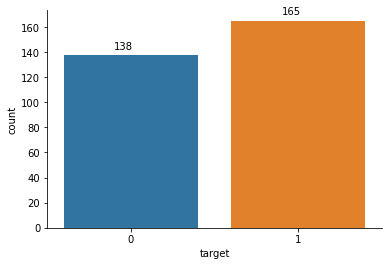

In [121]:
ax = sns.countplot(df['target'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

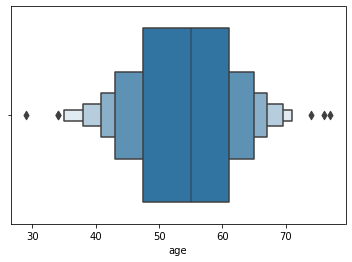

In [122]:
sns.boxenplot(df.age);

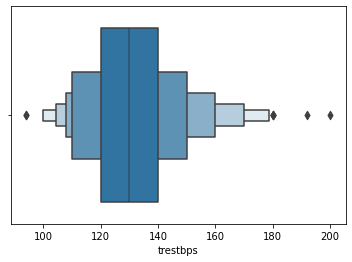

In [123]:
sns.boxenplot(df.trestbps); # dinlenme kan basıncı

In [124]:
#df=df[df.trestbps<170]

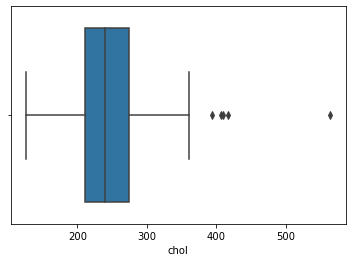

In [125]:
sns.boxplot(df.chol);

In [126]:
df=df[df.chol<500]

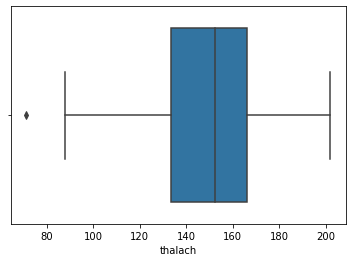

In [127]:
sns.boxplot(df.thalach);  # max kalp atışı

In [128]:
df=df[df.thalach>80]  

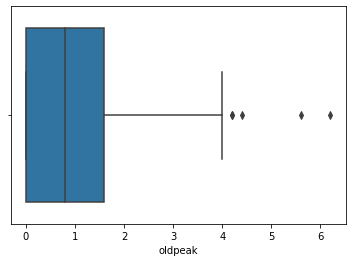

In [129]:
sns.boxplot(df.oldpeak);  # egzersize bağlı st depresyonu

In [130]:
#df=df[df.oldpeak<4]

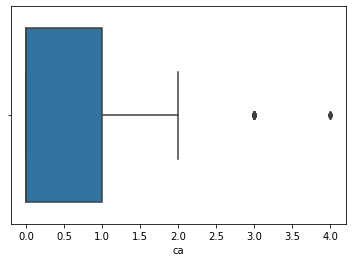

In [131]:
sns.boxplot(df.ca);  # büyük kan damar sayısı

In [132]:
df.ca.value_counts()

0    173
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [133]:
df=df[df.ca<3.5]

In [134]:
#sns.pairplot(df.select_dtypes(include='number'), hue = "target")  # Green:1 Blue:0

<AxesSubplot:>

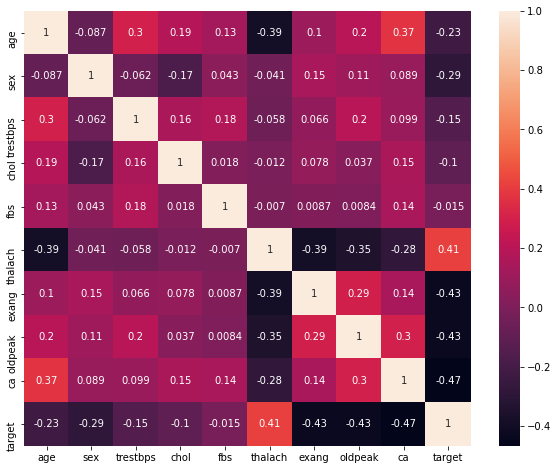

In [135]:
# çok gerekli değil
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

In [136]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        2
target      0
dtype: int64

In [139]:
df.thal = df.thal.fillna(value= df.thal.mode())

In [140]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        2
target      0
dtype: int64

## Train | Test Split and Scaling

In [141]:
df = pd.get_dummies(df,drop_first=True)
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145,233,1,150,0,2.3,0,1,0,0,0,0,1,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,0,0,0,1,1,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,0,0,1,0,0,1,0,0,1
299,45,1,110,264,0,132,0,1.2,0,0,0,0,0,0,0,1,0,0,1
300,68,1,144,193,1,141,0,3.4,2,0,0,0,1,0,0,1,0,0,1
301,57,1,130,131,0,115,1,1.2,1,0,0,0,1,0,0,1,0,0,1


In [142]:
X=df.drop(["target"], axis=1)
y=df["target"]

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify=y, random_state=5)

In [194]:
scaler =MinMaxScaler()

In [196]:
X_train_scaled = scaler.fit_transform(X_train)

In [197]:
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [198]:
log_model = LogisticRegression()

In [199]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [200]:
y_pred = log_model.predict(X_test_scaled)

In [201]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

## Model Performance

In [202]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [203]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[12  2]
 [ 2 14]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.88      0.88        16

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30


Train_Set
[[ 99  23]
 [ 13 131]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       122
           1       0.85      0.91      0.88       144

    accuracy                           0.86       266
   macro avg       0.87      0.86      0.86       266
weighted avg       0.87      0.86      0.86       266



### Cross Validate

In [204]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.010971,0.002992,0.812500,0.866667,0.838710,0.814815
2,0.006959,0.003986,0.764706,0.866667,0.812500,0.777778
3,0.005984,0.003018,0.937500,1.000000,0.967742,0.962963
4,0.007952,0.003019,0.833333,1.000000,0.909091,0.888889
5,0.005984,0.004962,0.875000,1.000000,0.933333,0.925926
6,0.012962,0.007034,0.785714,0.785714,0.785714,0.777778
7,0.007975,0.008002,0.846154,0.785714,0.814815,0.807692
8,0.013964,0.003963,0.764706,0.928571,0.838710,0.807692
9,0.010974,0.005009,0.923077,0.857143,0.888889,0.884615
10,0.007958,0.008004,0.846154,0.785714,0.814815,0.807692


In [206]:
df_scores.mean()[2:]     #  accuracy: 0.92   

test_precision    0.838884
test_recall       0.887619
test_f1           0.860432
test_accuracy     0.845584
dtype: float64

In [207]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[12  2]
 [ 2 14]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.88      0.88        16

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30


Train_Set
[[ 99  23]
 [ 13 131]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       122
           1       0.85      0.91      0.88       144

    accuracy                           0.86       266
   macro avg       0.87      0.86      0.86       266
weighted avg       0.87      0.86      0.86       266



### GridSearchCV

In [208]:
C = np.logspace(-1, 4, 20)
C

array([1.00000000e-01, 1.83298071e-01, 3.35981829e-01, 6.15848211e-01,
       1.12883789e+00, 2.06913808e+00, 3.79269019e+00, 6.95192796e+00,
       1.27427499e+01, 2.33572147e+01, 4.28133240e+01, 7.84759970e+01,
       1.43844989e+02, 2.63665090e+02, 4.83293024e+02, 8.85866790e+02,
       1.62377674e+03, 2.97635144e+03, 5.45559478e+03, 1.00000000e+04])

In [209]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : [C,1],
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'accuracy',       
                          n_jobs = -1)

In [210]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                               1],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [211]:
grid_model.best_params_

{'C': 1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}

In [212]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)  # 0.92------->0.88

Test_Set
[[12  2]
 [ 3 13]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.87      0.81      0.84        16

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30


Train_Set
[[101  21]
 [ 14 130]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       122
           1       0.86      0.90      0.88       144

    accuracy                           0.87       266
   macro avg       0.87      0.87      0.87       266
weighted avg       0.87      0.87      0.87       266



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [213]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

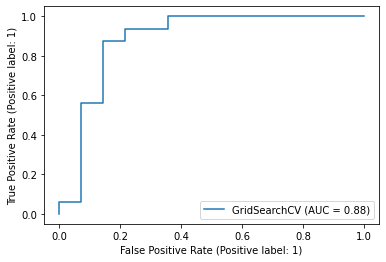

In [214]:
plot_roc_curve(grid_model, X_test_scaled, y_test)

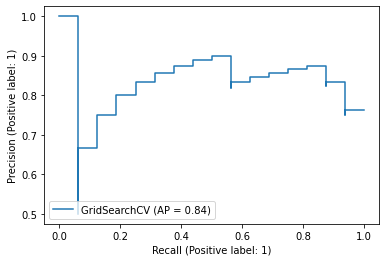

In [215]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

In [216]:
df.shape

(296, 19)

####  log_model final %25 test için Accuracy Score:0.89 -------------> 74 te 8 hatalı tahmin

####  log_model final %20 test için Accuracy Score:0.88 ------------->59 da 7 hatalı tahmin

####  log_model final %10 test için Accuracy Score:0.87 ------------->30 da 4 hatalı tahmin

In [217]:
num1 = 74
num2 = 59
num3 = 30
i = 1
while(i <= num1 and i <= num2 and i <= num3):
  if(num1 % i == 0 and num2 % i == 0 and num3 % i == 0):
    gcm = i
  i += 1
lcm = num1 * num2 / gcm
print("LCM is", lcm)

LCM is 4366.0


In [218]:
4366 / 74 * 8 # şimdilik en iyi sonuç % 25 test % 75 train

472.0

In [220]:
4366 / 59 * 7

518.0

In [219]:
4366 / 30 * 4

582.1333333333333

## KNN

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, stratify=y, random_state=5)

In [307]:
scaler = MinMaxScaler()

In [308]:
X_train_scaled = scaler.fit_transform(X_train)

In [309]:
X_test_scaled = scaler.transform(X_test)

In [310]:
from sklearn.neighbors import KNeighborsClassifier

In [311]:
knn = KNeighborsClassifier()

In [312]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [313]:
knn_pred = knn.predict(X_test_scaled)

In [314]:
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[11  3]
 [ 1 15]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.83      0.94      0.88        16

    accuracy                           0.87        30
   macro avg       0.88      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30


Train_Set
[[103  19]
 [ 16 128]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       122
           1       0.87      0.89      0.88       144

    accuracy                           0.87       266
   macro avg       0.87      0.87      0.87       266
weighted avg       0.87      0.87      0.87       266



### Elbow Method for Choosing Reasonable K Values

In [315]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [316]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

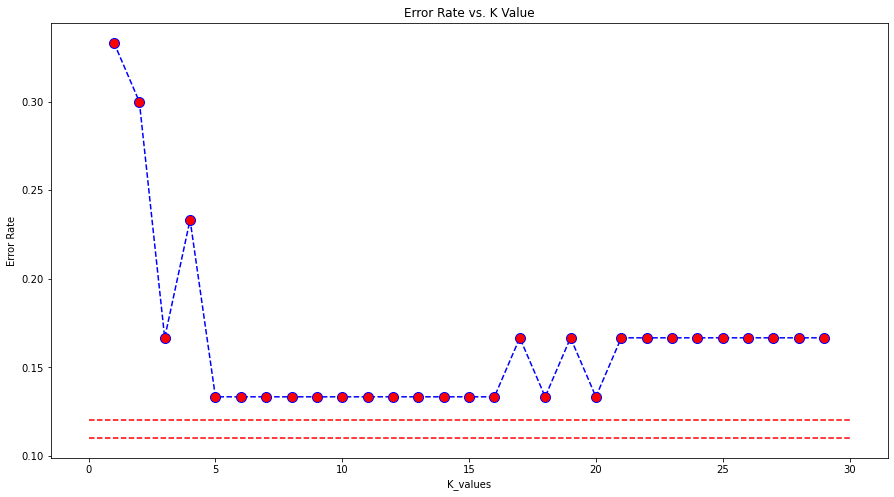

In [317]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.12, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.11, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

### Scores by Various K Values

In [336]:
knn = KNeighborsClassifier(n_neighbors=11)  # accuracy

knn.fit(X_train_scaled,y_train)
print('WITH K=11\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)  

WITH K=11

Test_Set
[[12  2]
 [ 2 14]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.88      0.88      0.88        16

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30


Train_Set
[[ 99  23]
 [ 18 126]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       122
           1       0.85      0.88      0.86       144

    accuracy                           0.85       266
   macro avg       0.85      0.84      0.84       266
weighted avg       0.85      0.85      0.85       266



In [337]:
knn = KNeighborsClassifier(n_neighbors=5)   # accuracy
knn.fit(X_train_scaled,y_train)
print('WITH K=22\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=22

Test_Set
[[11  3]
 [ 1 15]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.83      0.94      0.88        16

    accuracy                           0.87        30
   macro avg       0.88      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30


Train_Set
[[103  19]
 [ 16 128]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       122
           1       0.87      0.89      0.88       144

    accuracy                           0.87       266
   macro avg       0.87      0.87      0.87       266
weighted avg       0.87      0.87      0.87       266



### Cross Validate

In [320]:
model =KNeighborsClassifier()  

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.000998,0.005984,0.785714,0.733333,0.758621,0.740741
2,0.000998,0.008975,0.812500,0.866667,0.838710,0.814815
3,0.000998,0.006002,0.882353,1.000000,0.937500,0.925926
4,0.000980,0.007979,0.833333,1.000000,0.909091,0.888889
5,0.000997,0.004987,0.857143,0.857143,0.857143,0.851852
6,0.000998,0.005983,0.714286,0.714286,0.714286,0.703704
7,0.000000,0.004986,0.846154,0.785714,0.814815,0.807692
8,0.000998,0.003989,0.769231,0.714286,0.740741,0.730769
9,0.000998,0.004986,1.000000,0.785714,0.880000,0.884615
10,0.000000,0.003989,0.857143,0.857143,0.857143,0.846154


In [321]:
df_scores.mean()[2:]        # accuracy

test_precision    0.835786
test_recall       0.831429
test_f1           0.830805
test_accuracy     0.819516
dtype: float64

In [338]:
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[11  3]
 [ 1 15]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.83      0.94      0.88        16

    accuracy                           0.87        30
   macro avg       0.88      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30


Train_Set
[[103  19]
 [ 16 128]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       122
           1       0.87      0.89      0.88       144

    accuracy                           0.87       266
   macro avg       0.87      0.87      0.87       266
weighted avg       0.87      0.87      0.87       266



### Gridsearch Method for Choosing Reasonable K Values

In [339]:
knn_grid = KNeighborsClassifier()

In [340]:
k_values= range(1,30)

In [341]:
param_grid = {"n_neighbors":k_values}

In [342]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [343]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30)}, scoring='accuracy')

In [345]:
knn_grid_model.best_params_

{'n_neighbors': 29}

In [346]:
print('WITH K=29\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=29

Test_Set
[[11  3]
 [ 2 14]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.82      0.88      0.85        16

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83        30


Train_Set
[[ 97  25]
 [ 17 127]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       122
           1       0.84      0.88      0.86       144

    accuracy                           0.84       266
   macro avg       0.84      0.84      0.84       266
weighted avg       0.84      0.84      0.84       266



### Evaluating ROC Curves and AUC

In [347]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [348]:
knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)

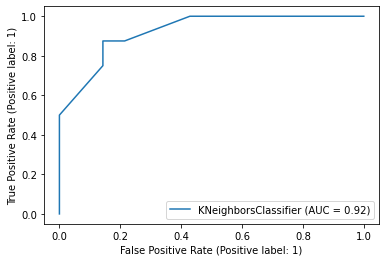

In [349]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [350]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.9241071428571429

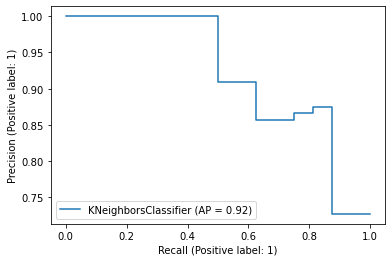

In [351]:
plot_precision_recall_curve(knn_model, X_test_scaled, y_test);

#### knn final % 25 test için Accuracy Score:0.88------->74 te 9 hatalı tahmin k = elbow best değer 5

#### knn final % 20 test için Accuracy Score:0.90------->59 te 6 hatalı tahmin k = elbow best değer 20(hata 6) ancak 5 te de pek fark yok(hata 7).

#### knn final % 10 test için Accuracy Score:0.87------->30 te 4 hatalı tahmin k = elbow best değer 5(20 ye kadar bütün değerler aynı sonuç veriyor.)

In [352]:
num1 = 74
num2 = 59
num3 = 30
i = 1
while(i <= num1 and i <= num2 and i <= num3):
  if(num1 % i == 0 and num2 % i == 0 and num3 % i == 0):
    gcm = i
  i += 1
lcm = num1 * num2 / gcm
print("LCM is", lcm)

LCM is 4366.0


In [353]:
4366 / 74 *9

531.0

In [354]:
4366 / 59 * 6 # en iyi değer şimdilik

444.0

In [355]:
4366 / 30 * 4

582.1333333333333